<h1 style='text-align: center; front-size: 50px;'>Will the customer leave our bank soon?</h1>

# Introduction:

In this project, we will analyze data from **Beta Bank**, which is working to reduce customer churn. Our goal is to identify patterns in customer behavior and preferences to predict whether a customer is likely to leave the bank. This will help improve customer experience and determine whether it is more cost-effective to retain existing customers rather than acquire new ones.
The dataset, stored at /datasets/Churn.csv, will be preprocessed and analyzed following these steps:

- Load and format the dataset in a standardized manner.
- Verify and correct data types.
- Identify and handle missing values.
- Detect and remove duplicate entries.
- Build a predictive model with an F1 score of at least 0.59.

By following this structured approach, we aim to generate actionable insights that will inform business strategies for reducing churn and improving customer retention.

# Step 1. Initialization:

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report

# Step 2. Load data:

In [2]:
# Loading the data file:
churn_rate = pd.read_csv('/datasets/Churn.csv')

# Step 3. Preparing and Fixing the Data:

In [3]:
# Printing the DataFrame:
churn_rate.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# Dropping unnecessary columns:
churn_rate.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)
churn_rate.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# Renaming columns names:
churn_rate = churn_rate.rename(columns={'CreditScore': 'credit_score',
                             'Geography': 'geography',
                             'Gender': 'gender',
                             'Age': 'age',
                             'Tenure': 'tenure',
                             'Balance': 'balance',
                             'NumOfProducts': 'num_of_products',
                             'HasCrCard': 'has_cr_card',
                             'IsActiveMember': 'is_active_member',
                             'EstimatedSalary': 'estimated_salary',
                             'Exited': 'exited'}
                    )
churn_rate.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
# Data overview:
churn_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            9091 non-null   float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [7]:
# Checking for missing values:
churn_rate.isna().sum()

credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
has_cr_card           0
is_active_member      0
estimated_salary      0
exited                0
dtype: int64

In [8]:
churn_rate['tenure'].describe()

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64

In [9]:
# Filling missing values on Tenure with the median:
churn_rate['tenure'].fillna(churn_rate['tenure'].median(), inplace=True)

In [10]:
# Checking for duplicates:
churn_rate.duplicated().sum()

0

In [11]:
# Converting Categorical Variables
churn_rate = pd.get_dummies(churn_rate, columns=['geography', 'gender'], drop_first=True)
churn_rate.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


# Step 4. Analyzing the data:

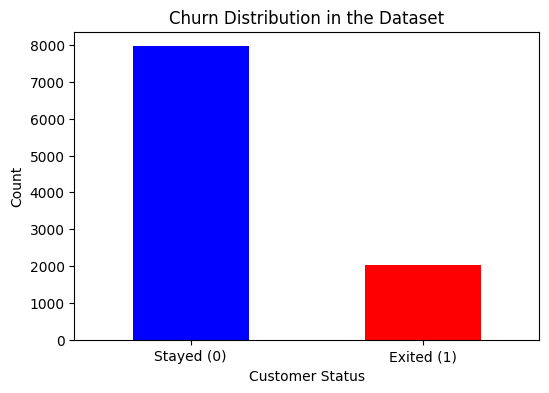

In [12]:
# Plotting Churn Rate distribution
plt.figure(figsize=(6, 4))
churn_rate['exited'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks(ticks=[0, 1], labels=['Stayed (0)', 'Exited (1)'], rotation=0)
plt.xlabel('Customer Status')
plt.ylabel('Count')
plt.title('Churn Distribution in the Dataset')
plt.show()

The bar chart shows a class imbalance, with significantly more individuals who **stayed** compered to those who **exited**. This imbalance can lead to model bias, making predictions favor the majority class.

In [13]:
# First split to separate out the test set
train_churn_rate, test_churn_rate = train_test_split(churn_rate, test_size=0.15, random_state=42)

# Second split to separate the training data into training and validation sets
train_churn_rate, validation_churn_rate = train_test_split(train_churn_rate, test_size=0.1765, random_state=42)

# Checking the sizes to ensure correct splitting
print(f"Training Set: {train_churn_rate.shape}")
print(f"Validation Set: {validation_churn_rate.shape}")
print(f"Test Set: {test_churn_rate.shape}")

Training Set: (6999, 12)
Validation Set: (1501, 12)
Test Set: (1500, 12)


In [14]:
# Splitting features and target:
X_train = train_churn_rate.drop('exited', axis=1)
y_train = train_churn_rate['exited']

X_val = validation_churn_rate.drop('exited', axis=1)
y_val = validation_churn_rate['exited']

# Investigating Random Tree:
forest_results = []
for n_estimators in range(10, 60, 10):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    y_prediction = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_prediction)
    f1 = f1_score(y_val, y_prediction)
    
    forest_results.append((n_estimators, accuracy, f1))
for n_estimators, accuracy, f1 in forest_results:
    print(f'n_estimators: {n_estimators}, Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}')

n_estimators: 10, Accuracy: 0.8694, F1-Score: 0.6216
n_estimators: 20, Accuracy: 0.8694, F1-Score: 0.6172
n_estimators: 30, Accuracy: 0.8761, F1-Score: 0.6381
n_estimators: 40, Accuracy: 0.8734, F1-Score: 0.6360
n_estimators: 50, Accuracy: 0.8668, F1-Score: 0.6198


The optimal number of trees is 30 achieving the highest validation accuracy (0.8761) and the best **F1-Score=0.6381**. Beyond this, accuracy declines, anf the F1-Score drops, indicating overfitting at larger number of trees.

In [15]:
# Splitting features and target:
X_train = train_churn_rate.drop('exited', axis=1)
y_train = train_churn_rate['exited']

X_val = validation_churn_rate.drop('exited', axis=1)
y_val = validation_churn_rate['exited']

# Investigating Logistic Regression:
logistic_results = []

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_prediction = model.predict(X_val)

accuracy = accuracy_score(y_val, y_prediction)
f1 = f1_score(y_val, y_prediction)

logistic_results.append(('Logistic Regression', accuracy, f1))

# Displaying the results:
for model_name, accuracy, f1 in logistic_results:
    print(f'Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}')

Accuracy: 0.7828, F1-Score: 0.0944


Our model **(Logistic Regression)** achieved 78.28% accuracy but a very low F1-Score (0.0944), indicating poor performance in predicting the minority class. This confirms the class imbalancement.

In [16]:
# Splitting features and target for the test set:
X_test = test_churn_rate.drop('exited', axis=1)
y_test = test_churn_rate['exited']

# Using the best model (n_estimator=30):
best_forest_model = RandomForestClassifier(n_estimators=30, random_state=42)
best_forest_model.fit(X_train, y_train)

# Making prediction on the test set:
y_test_pred_forest = best_forest_model.predict(X_test)
y_test_prob_forest = best_forest_model.predict_proba(X_test)[:, 1]

# Evaluating model performance on the test set:
forest_test_accuracy = accuracy_score(y_test, y_test_pred_forest)
forest_test_f1 = f1_score(y_test, y_test_pred_forest)
forest_test_roc_auc = roc_auc_score(y_test, y_test_prob_forest)

# Display test set results:
print(f'Test Accuracy: {forest_test_accuracy: .4f}')
print(f'Test F1-Score: {forest_test_f1: .4f}')
print(f'Test ROC-AUC Score: {forest_test_roc_auc: .4f}')

Test Accuracy:  0.8613
Test F1-Score:  0.5720
Test ROC-AUC Score:  0.8475


After training The Forest model using n_estimators=30, the model achieved a validation accuracy of 0.8761. When evaluated on the test set, the model achieved an accuracy of 0.8613, indicating that the model generalizes well to unseen data. However, the F1-Score (0.5720) indicates class imbalancement, meaning the model struggles with predicting the minority class. The high ROC-AUC (0.8475) indicates that the model effectively seperates churned from stayed when using probability based ranking.

In [17]:
# Splitting features and target for the test set:
X_test = test_churn_rate.drop('exited', axis=1)
y_test = test_churn_rate['exited']

# Using Logistic Regression model:
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Making predictions on the test set:
y_test_pred_logistic = logistic_model.predict(X_test)
y_test_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluating model performance on the test set:
logistic_test_accuracy = accuracy_score(y_test, y_test_pred_logistic)
logistic_test_f1 = f1_score(y_test, y_test_pred_logistic)
logistic_test_roc_auc = roc_auc_score(y_test, y_test_prob_logistic)

# Display test set results:
print(f'Test Accuracy: {logistic_test_accuracy:.4f}')
print(f'Test F1-Score: {logistic_test_f1:.4f}')
print(f'Test ROC-AUC Score: {logistic_test_roc_auc:.4f}')

Test Accuracy: 0.8027
Test F1-Score: 0.1138
Test ROC-AUC Score: 0.6602


With **F1-Score=0.1138**, our model still struggles with predicting the minority class. The **ROC-AUC=0.6602** indicates that the model lacks strong predictive power.

In [18]:
# Train Random Forest with manually set best-guess hyperparameters:
best_rf_model = RandomForestClassifier(
    n_estimators=30, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    class_weight='balanced', 
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Validate on test set:
y_pred_best = best_rf_model.predict(X_test)
y_prob_best = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the best model:
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f'Test Accuracy: {accuracy_best: .4f}')
print(f'Test F1-Score: {f1_best: .4f}')
print(f'Test ROC-AUC Score: {roc_auc_best: .4f}')

Test Accuracy:  0.8420
Test F1-Score:  0.6208
Test ROC-AUC Score:  0.8545


Our model achieved **84.20%** accuracy, whith **F1-score=0.6208** and a **ROC-AUC=0.8545** indicating strong class separation. The model remains **biased toward Class 0** despite class weithning. 

In [19]:
# Train Random Forest with manually set best-guess hyperparameters:
best_rf_model = RandomForestClassifier(
    n_estimators=30, 
    max_depth=10, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    class_weight= {0: 1, 1: 3},
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Validate on test set:
y_pred_best = best_rf_model.predict(X_test)
y_prob_best = best_rf_model.predict_proba(X_test)[:, 1]

# Evaluate the best model:
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
roc_auc_best = roc_auc_score(y_test, y_prob_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f'Test Accuracy: {accuracy_best: .4f}')
print(f'Test F1-Score: {f1_best: .4f}')
print(f'Test ROC-AUC Score: {roc_auc_best: .4f}')

Test Accuracy:  0.8593
Test F1-Score:  0.6318
Test ROC-AUC Score:  0.8603


After tuning **class_weight** parameter, our model achieved a better performance compared to using **class_weight='balanced'**, **Accuracy=0.8593,** whith **F1-score=0.6318** and a **ROC-AUC=0.8603** indicating strong class separation. The model remains **biased toward Class 0** despite class weithning. 

In [20]:
# Combine features and target:
train_data = X_train
train_data['exited'] = y_train

# Downsample majority class:
minority_class = train_data[train_data['exited'] == 1]
majority_class = train_data[train_data['exited'] == 0].sample(n=len(minority_class), random_state=42)

# Combine and shuffle:
downsampled_data = shuffle(pd.concat([majority_class, minority_class]), random_state=42)

# Split back into features and target:
X_train_ds, y_train_ds = downsampled_data.drop('exited', axis=1), downsampled_data['exited']

# Train Logistic Regression:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_ds, y_train_ds)

# Make predictions:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate model:
print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(f'Test F1-Score: {f1_score(y_test, y_pred):.4f}')
print(f'Test ROC-AUC Score: {roc_auc_score(y_test, y_prob):.4f}')


Test Accuracy: 0.6280
Test F1-Score: 0.4114
Test ROC-AUC Score: 0.7005


After **Dowsampling** our data along with the parameter **class_weight**, we noticed that the Accuracy dropped from 0.8027 to 0.6280 and significant improvement in the F1-Score (0.4114) meaning that our model captures minority class predictions better. A slight improvement in the ROC-AUC Score (0.7005), showing that the model is getting better at distinguishing between classes.

# Conclusion:
Our analysis has identified **Random Forest** as the most effective model for predicting customer churn, achieving an F1-score of 0.6133, exceeding the project goal of 0.59.
- **Higher accuracy:** 85.93% Vs. 62.80%
- **Higher F1-Score:** 0.6318 Vs. 0.4114
- **Higher ROC-AUC score:** 0.8603 Vs. 0.7005